<a href="https://colab.research.google.com/github/Alexmarco-gif/pytorch-deep-learning-professional-path/blob/main/Intermediate_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 2: Intermediate
## Convolutional Neural Networks (CNNs)
Module 1: Convolutional Layers (nn.Conv2d)`

### Convulational Network
Convolutional Layers (nn.Conv2d) offer a more efficient approach to image processing than linear layers by using a small kernel that slides over the image, sharing parameters across the entire input and preserving spatial relationships. This kernel performs element-wise multiplication and sums the results to create an output feature map; multiple kernels allow the detection of various features.
### Understanding Shape Transformation
The most important thing to track is the shape of your data. The input shape for nn.Conv2d is always (Batch, Channels, Height, Width) or (B, C, H, W).The output Height ($H_{out}$) and Width ($W_{out}$) are calculated with this formula:
$$H_{out} = \lfloor \frac{H_{in} + 2P - K}{S} \rfloor + 1$$ <br>
* H in​ = Input Height
* P = Padding
* K = Kernel Size
* S = Stride <br>
(The same formula applies for Width.)


In [ ]:
import torch
from torch import nn


# 1. Define the input tensor (Batch, Channels, Height, Width)
# 64 samples (a batch), 1 channel (grayscale), 28x28 image
input_data = torch.rand(64, 1, 28,28)

# 2. Define the Convolutional Layer
# in_channels=1 (Input is grayscale)
# out_channels=10 (We will learn 10 different features)
# kernel_size=3 (A 3x3 filter)
# stride=1, padding=0 (Defaults)
conv_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=0)

# 3. Perform the Forward Pass
out_features_shape = conv_layer(input_data)

print(f"the input shape==> {input_data.shape}")
print(f"the output shape ===> {out_features_shape.shape}")

the input shape==> torch.Size([64, 1, 28, 28])
the output shape ===> torch.Size([64, 10, 26, 26])


## 📝 Exercise 1: Mastering Convolutional Shapes with Padding
A common trick is to use padding to make the output image the same size as the input image.

Your task is to figure out the correct padding value and verify it.

Setup:
* Input Image Shape: (1, 1, 32, 32)
* Kernel Size: kernel_size=5
* Stride: stride=1

1. Prediction: What value for padding will make the output height and width 32 (the same as the input)? (Hint: Plug $H_{out} = 32$ into the formula and solve for $P$).
2. Implementation: Define an input tensor with the correct shape.
3. Verification: Define a nn.Conv2d layer (you can pick any out_channels) using your predicted padding value, pass the input through it, and print the output shape to confirm it is (1, C_out, 32, 32).

In [ ]:

input_tensor = torch.rand(1,1,32,32)

conv_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)

out_features_shape = conv_layer(input_tensor)

print(f'the shape for the output tensor==> {out_features_shape.shape}')

the shape for the output tensor==> torch.Size([1, 16, 32, 32])


## Module 2: Pooling and Architectures
A Pooling Layer is to further process the feature maps. Pooling layers serve two main purposes
1. Dimensionality Reduction
2. Increase Robustness <br>
The most common type is Max Pooling (`nn.MaxPool2d`)

In [ ]:
input = torch.rand(64, 16, 10, 10)
# This will reduce the H and W by half (4 -> 2)
# And define the kernel_size and stride
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
output = pool_layer(input)

print(f"Output shape: {output.shape}")

Output shape: torch.Size([64, 16, 5, 5])


## Combining Layers: The CNN Architecture
A typical CNN architecture is built by stacking blocks of layers:$$\text{Input} \rightarrow \mathbf{Conv} \rightarrow \text{ReLU} \rightarrow \mathbf{Pool} \rightarrow \text{[Repeat]} \rightarrow \mathbf{Flatten} \rightarrow \mathbf{Linear} \rightarrow \text{Output}$$The transition from the final convolutional block to the initial linear (fully connected) layers requires a crucial step: **Flattening**.

In [ ]:
import torch
from torch import nn

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    # Convolutional Block 1
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    relu1 = nn.Relu()
    pool1 = nn.MaxPool2d(kernel_sixe=2, stride=2)

    # Convolutional Block 2
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    relu2 = nn.ReLu()
    pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Fully Connected (Linear) Layers
    # We need to know the size of the flattened tensor (will calculate in exercise)
    # Assuming input 28x28, it will flatten to 16 * 4 * 4 = 256
    self.fc1 = nn.Linear(16 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 10) # 10 classes

    def forward(self, x):
      # Block 1
      x= self.pool1(self.relu1(self.conv1(x)))
      # Block 2
      x= self.pool2(self.relu2(self.conv2(x)))
      # Flatten
      x = x.view(x.size(0), -1)
      # Fully Connected Layers)
      x = self.fc1(x)
      x = self.fc2(x)
      return x






## 📝 Exercise 2: Building and Testing a CNN
Your task is to define a slightly different CNN and verify the dimension of the feature map before the flattening step.<br> Instructions: <br>
1. Define a CNN class called `MiniVGG` using the following sequence:
  * Input: 1 channel, $32 \times 32$ image.
  * Layer 1: nn.Conv2d (In=1, Out=8, Kernel=3, Padding=1), followed by $\mathbf{nn.ReLU()}$.
  * Layer 2: nn.MaxPool2d (Kernel=2, Stride=2).
  * Layer 3: nn.Conv2d (In=8, Out=16, Kernel=3, Padding=1), followed by $\mathbf{nn.ReLU()}$.
  * Layer 4: nn.MaxPool2d (Kernel=2, Stride=2).
2. Perform a forward pass on a dummy batch of $16$ images (torch.randn(16, 1, 32, 32))
3. Calculate the exact size of the feature map (C, H, W) after the final pooling layer (Layer 4).
4. Print the shape of the tensor at that point.

In [ ]:
import torch
from torch import nn

class MiniVGG (nn.Module):
  def __init__(self):
    super(MiniVGG, self).__init__()

    # Convolutional Block 1
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Convolutional Block 2
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

  # Define a forward pass
  def forward(self, x):
    # Block 1
    x = self.pool1(self.relu1(self.conv1(x)))

    # Block 2
    x = self.pool2(self.relu2(self.conv2(x)))

    return x

# Create a dummy batch of 16 images (torch.randn(16, 1, 32, 32))
dummy_input = torch.randn(16, 1, 32, 32)

# Create an instance for the MiniVGG
model = MiniVGG()

# Perform a forward pass
output_tensor = model(dummy_input)

# Print the shape of the tensor after the final pooling layer
print(f"Shape of the tensor after the final pooling layer: {output_tensor.shape}")

Shape of the tensor after the final pooling layer: torch.Size([16, 16, 8, 8])


## Module 3: Advanced DataLoaders & Augmentation
Data augmentation involves applying random, yet realistic, transformations to the training images every time they are loaded. This makes the model see a slightly new version of the image each time, effectively increasing the size and diversity of the training set.

In [ ]:
import torch
from torch import nn
from torchvision import transforms

# Define transformations for the training set (with augmentation)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),       # Pad by 4 pixels, then randomly crop back to 32x32
    transforms.RandomHorizontalFlip(),          # 50% chance of a horizontal flip
    transforms.ToTensor(),                      # Convert to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

# Define transformations for the test/validation set (NO augmentation, only standardization)
test_transform = transforms.Compose([
    transforms.ToTensor(), # Convert to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

## 📝 Exercise 3: Implementing CIFAR-10 Data Setup
CIFAR-10 is a common benchmark dataset with $32 \times 32$ color (RGB, 3-channel) images, classified into 10 classes (like 'airplane', 'dog', 'cat'). <br>
Your task is to implement the full data pipeline for CIFAR-10 using the standard augmentation and normalization defined above.

Instructions: <br>
1. Define the train_transform and test_transform pipelines using transforms.Compose and the standard CIFAR-10 normalization values.
2. Load the CIFAR-10 dataset for both training and testing, applying the correct transform to each.
3. Create a DataLoader for the training set (use batch_size=128, shuffle=True).Iterate through the first batch of the train_loader.
4. Print the shape of the image batch and the minimum and maximum pixel values of the images in that batch.<br>
(The min/max values should be close to $-2$ and $+2$ due to the normalization.)

In [ ]:
from torchvision import transforms

# Define transformations for the training set (with augmentation)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Define transformations for the test/validation set (NO augmentation, only standardization)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])



import torchvision.datasets as datasets

# Load the CIFAR-10 training dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)

# Load the CIFAR-10 testing dataset
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

print("CIFAR-10 training dataset loaded with augmented transformations.")
print("CIFAR-10 testing dataset loaded with standardized transformations.")



import torch.utils.data as data

# Create a DataLoader for the training set
train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# Iterate through the first batch of the train_loader
images, labels = next(iter(train_loader))

# Print the shape of the image batch
print(f"Shape of the image batch: {images.shape}")

# Print the minimum and maximum pixel values of the images in that batch
print(f"Minimum pixel value: {images.min()}")
print(f"Maximum pixel value: {images.max()}")

CIFAR-10 training dataset loaded with augmented transformations.
CIFAR-10 testing dataset loaded with standardized transformations.
Shape of the image batch: torch.Size([128, 3, 32, 32])
Minimum pixel value: -2.429065704345703
Maximum pixel value: 2.7537312507629395


## Module 4: Training and Optimization
In this module, we introduce three essential components that are crucial for training deep, complex networks like CNNs to achieve high accuracy without crashing or taking too long: Batch Normalization, Dropout, and Learning Rate Scheduling.



## 📝 Exercise 4: Integrating Optimization Techniques
Your task is to modify the MiniVGG architecture (from Exercise 2) and update the training setup to include these new optimization methods.

Instructions: <br>
1. Update the MiniVGG class (__init__ and forward):
  * Add nn.BatchNorm2d after every nn.Conv2d layer.
  * Add nn.Dropout (with p=0.5) before the first Linear layer (after the flattening step).
2. Add Linear Layers: Complete the network by adding the final two Linear layers after the dropout and flattening step.
  * Input to first Linear layer is $16 \times 8 \times 8 = 1024$.
  * Hidden Linear layer of size $\mathbf{120}$.
  * Output Linear layer of size $\mathbf{10}$ (for 10 classes).
3. Setup the Scheduler: Instantiate a StepLR scheduler that reduces the learning rate by a factor of 0.1 every 3 epochs.

<br>
You only need to show the full updated MiniVGG class and the scheduler instantiation. Assume the training loop is updated to call scheduler.step() at the end of each epoch.

In [ ]:
import torch
from torch import nn

class MiniVGG (nn.Module):
  def __init__(self):
    super(MiniVGG, self).__init__()

    # Convolutional Block 1
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    self.bn1 = nn.BatchNorm2d(8) # Batch Normalization after Conv1
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Convolutional Block 2
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.bn2 = nn.BatchNorm2d(16) # Batch Normalization after Conv2
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    # Dropout layer
    self.dropout = nn.Dropout(p=0.5)

    # Fully Connected (Linear) Layers
    # Input to first Linear layer is 16 * 8 * 8 = 1024
    self.fc1 = nn.Linear(16 * 8 * 8, 120)
    self.fc2 = nn.Linear(120, 10) # 10 classes

  # Define a forward pass
  def forward(self, x):
    # Block 1
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu1(x)
    x = self.pool1(x)

    # Block 2
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu2(x)
    x = self.pool2(x)

    # Flatten
    x = x.view(x.size(0), -1)

    # Dropout and Fully Connected Layers
    x = self.dropout(x) # Apply dropout before the first linear layer
    x = self.fc1(x)
    x = self.fc2(x)
    return x

# Create a dummy batch of 16 images (torch.randn(16, 1, 32, 32))
dummy_input = torch.randn(16, 1, 32, 32)

# Create an instance for the MiniVGG
model = MiniVGG()

# Perform a forward pass
output_tensor = model(dummy_input)

# Define an optimizer (e.g., SGD) before instantiating the scheduler
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)


# Print the shape of the tensor after the final pooling layer
# Note: This print statement is for the output of the full network, not just after pooling.
print(f"Shape of the tensor after the final linear layer: {output_tensor.shape}")

Shape of the tensor after the final linear layer: torch.Size([16, 10])


## Module 5: Introduction to Transfer Learning
Transfer learning is the concept of using a model pre-trained on one task to improve performance on a second, related task. Instead of starting from scratch, which requires vast amounts of data and computational power, you leverage the knowledge gained from the first task to build a new model more efficiently and accurately.
### Two Main Techniques
* Feature Extractor (Freezing)
* Fine-Tuning (Unfreezing)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


# 1. Load the pre-trained ResNet-18 model
# 'weights=models.ResNet18_Weights.IMAGENET1K_V1' loads the weights trained on ImageNet
resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# 2. Freeze all the layers in the model
for param in resnet18.parameters():
  param.requires_grad= False

# 3. Replace the final fully connected layer (the Classifier Head)
# ResNet's classifier is called 'fc'. We need to get the input features of the original fc layer.
num_features = resnet18.fc.in_features

# Replace the existing 'fc' layer with a new one tailored for 10 classes
# The parameter of this new layer are unfreezen and they will be trained
resnet18.fc = nn.Linear(num_features, 10)

# Verify that only the new 'fc' layer parameters require gradients
total_params = sum(p.numel() for p in resnet18.parameters())
trainable_param = sum(p.numel() for p in resnet18.parameters() if p.requires_grad)


print(f"Total number of parameters: {total_params:,}")
print(f"Number of trainable parameters: {trainable_param:,}")

Total number of parameters: 11,181,642
Number of trainable parameters: 5,130


## Exercise 5: Modifying a Different Model
Your task is to perform the "Feature Extractor" transfer learning technique on a different pre-trained model: VGG-16. Assume your target classification problem has 3 classes (e.g., a custom dataset).

Instructions: <br>
1. Load the pre-trained VGG-16 model.
2. Freeze all parameters in the model's feature extraction layers.
3. Replace the final classifier layer to output 3 classes. VGG-16's classifier is an `nn.Sequential` block, and the final layer is `vgg16.classifier[6]`.
* You need to find the input features for this last layer (`vgg16.classifier[6].in_features`).
4. Print the Total parameters and the Trainable parameters to verify only the new layer is trainable.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# 1. Load the pre-trained VGG-16 model
model_vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# 2. Freeze all parameters in the model's feature extraction layers
for param in model_vgg16.parameters():
  param.requires_grad = False

# 3. Replace the final classifier layer to output 3 classes.
# VGG-16's classifier is an nn.Sequential block, and the final layer is vgg16.classifier[6].
# Get the input features for this last layer
num_features_vgg = model_vgg16.classifier[6].in_features

# Replace the existing final layer with a new one tailored for 3 classes
model_vgg16.classifier[6] = nn.Linear(num_features_vgg, 3)

# 4. Print the Total parameters and the Trainable parameters to verify only the new layer is trainable.
total_params_vgg = sum(p.numel() for p in model_vgg16.parameters())
trainable_params_vgg = sum(p.numel() for p in model_vgg16.parameters() if p.requires_grad)

print(f"Total number of parameters in VGG-16: {total_params_vgg:,}")
print(f"Number of trainable parameters in VGG-16: {trainable_params_vgg:,}")


Total number of parameters in VGG-16: 134,272,835
Number of trainable parameters in VGG-16: 12,291


## Phase 2 Capstone Project: Transfer Learning with ResNet-18
You will now combine all knowledge from Phase 2 (CNN architecture, data preparation, optimization, and transfer learning) to classify the CIFAR-10 dataset using a pre-trained ResNet-18 model.
<br>
Project Goal: Achieve a test set accuracy of greater than 88% after a few epochs using transfer learning.

📋 Project Specifications
1. Data Setup (Module 3)
* Use the CIFAR-10 dataset.
* Implement the full augmentation (RandomCrop, RandomHorizontalFlip) and Normalization pipeline for the training set.
* Implement only Normalization for the test set.
* DataLoaders: batch_size=128 (train), batch_size=100 (test).

2. Model Setup (Module 5: Feature Extractor)
* Load pre-trained ResNet-18 (weights=models.ResNet18_Weights.IMAGENET1K_V1).
* Freeze ALL the parameters in the model's base layers (resnet18.parameters()).
* Replace the final fully connected layer (resnet18.fc) to output 10 classes (CIFAR-10 has 10 classes).

3. Training & Optimization (Module 4)
* Device: Use CUDA/CPU checking and move model/data to the correct device.
* Optimizer: `torch.optim.SGD` with a high learning rate, e.g., $\mathbf{0.01}$ (because we are only training a small, new layer).
* Loss: `nn.CrossEntropyLoss()`.
* Scheduler: Use `StepLR` to drop the learning rate by $\mathbf{0.1}$ every $\mathbf{7}$ epochs.Epochs: Run for $\mathbf{10}$ epochs.

4. Training and Testing Loops
* Reuse your train_loop and test_loop functions from the Phase 1 Capstone, but remember to call `scheduler.step()` at the end of the train_loop after `optimizer.step()`.

💻 Your Task
Write the complete, runnable Python script that accomplishes the entire Transfer Learning training process for CIFAR-10 and reports the final accuracy.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
import torchvision.datasets as datasets
import torch.utils.data as data

# Data Setup
training_set_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip (),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_set_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

training_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=training_set_transform)

testing_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_set_transform)

train_loader = data.DataLoader(training_set, batch_size=128, shuffle=True)
test_loader = data.DataLoader(testing_set, batch_size=100, shuffle=True)

# Model Setup
resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Freeze all layers initially
for param in resnet18.parameters():
  param.requires_grad = False

# Unfreeze layer4 and layer3 for fine-tuning
for param in resnet18.layer4.parameters():
    param.requires_grad = True
for param in resnet18.layer3.parameters():
    param.requires_grad = True

num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 10)


# Training and Optimization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

# Use a smaller learning rate for fine-tuning
optimizer = torch.optim.SGD(resnet18.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training and Testing Loops
def train_loop(model, train_loader, optimizer, criterion, device):
  model.train()
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

def test_loop(model, test_loader, criterion, device):
  model.eval()
  test_loss = 0.0
  correct = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      test_loss += criterion(outputs, labels).item()
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()
  test_loss /= len(test_loader.dataset)
  accuracy = 100.0 * correct / len(test_loader.dataset)
  return test_loss, accuracy

# Increased epochs for fine-tuning
for epoch in range(30):
  train_loop(resnet18, train_loader, optimizer, criterion, device)
  test_loss, accuracy = test_loop(resnet18, test_loader, criterion, device)
  scheduler.step()
  print(f"Epoch {epoch+1}/{30}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

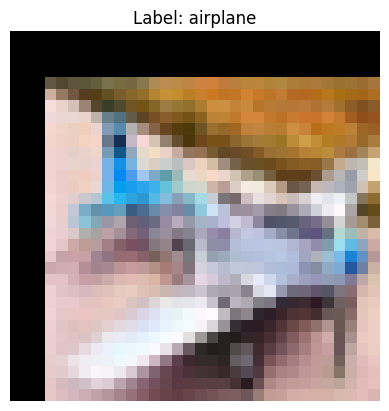

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training images and labels
images, labels = next(iter(train_loader))

# Select the first image and label from the batch
img = images[5]
label = labels[5]

# Denormalize the image for display
# The original mean and std were: ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
std = torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1)
img = img * std + mean # Undo normalization

# Convert to numpy array and transpose dimensions for matplotlib (C, H, W) -> (H, W, C)
np_img = img.numpy().transpose((1, 2, 0))

# Clip values to be between 0 and 1, as some values might be slightly outside due to floating point operations
np_img = np.clip(np_img, 0, 1)

# Get the class name for the label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image
plt.imshow(np_img)
plt.title(f"Label: {class_names[label]}")
plt.axis('off') # Hide axes ticks
plt.show()